#**Caça ao Tesouro**

### **Trabalho 1**
Neste trabalho, o(a) aluno(a) deve implementar três algoritmos de busca (Busca de Custo Uniforme, Busca Gulosa e A*) para resolver um problema de caça ao tesouro em um mapa. O objetivo é encontrar o caminho mais curto ou mais eficiente para coletar o tesouro que se encontra no mapa.

#### **Configuração do Problema**
1. **Mapa de matriz**: O ambiente é representado como uma matriz, onde cada célula pode ser:
   - Uma **célula vazia** (o robô pode passar por ela e o custo é 1),
   - Um **obstáculo** (o robô não pode passar por ela),
   - Uma **lama** (o custo para passar por essa célula é 5),
   - Um **tesouro** (o robô pode coletar ao alcançar essa célula).
   
2. **Posição Inicial**: A posição inicial sera passada como parametro.
3. **Posição do Tesouro**: A posição do tesouro sera passada como parametro.

#### **Exemplo de Mapa**
- `I` = Posição Inicial
- `T` = Tesouro
- `#` = Obstáculo
- `L` = Lama
- `.` = Célula Vazia

Exemplo de Mapa:

```
I # . # L L T
. # . # L # .
. # . # L # .
. # . . . # .
. # . # . # .
. # . # . # .
. . . # . . .
```

### **Implementação dos Algoritmos**
1. **Busca de Custo Uniforme (UCS)**
   - Implemente a Busca de Custo Uniforme para encontrar o caminho mais curto da posição inicial até um tesouro.

2. **Busca Gulosa**
   - Implemente uma busca gulosa para encontrar um caminho ao tesouro.
   - A heurística deve ser a [distância Manhattan](https://pt.wikipedia.org/wiki/Geometria_do_t%C3%A1xi) entre a posição atual e a posição do tesouro.
  
3. **Busca A\***
   - Implemente o algoritmo de busca A* para coletar todo o tesouro.
   - A heurística deve ser também a [distância Manhattan](https://pt.wikipedia.org/wiki/Geometria_do_t%C3%A1xi).


### **Retorno das Funções**

Cada função de busca deverá retornar um array contendo as posições que representam o caminho percorrido até o tesouro. Esse array deve listar, em ordem, todas as coordenadas visitadas pelo algoritmo, desde a posição inicial até a posição do tesouro final. As coordenadas devem ser organizadas no formato `(linha, coluna)`, facilitando a visualização do percurso realizado pelo robô no mapa.

Caso não exista um caminho possível até o tesouro, a função deve retornar um array vazio `([])`.

**Exemplo de Retorno:**
```python
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6)]
```


#### **Desafio: Múltiplos Tesouros**
   - Altere as funções da Busca Gulosa e Busca A* para receber como parâmetro um array com a posição de vários tesouros, e calcule uma rota para coletar todos.


### **Entrega**
A entrega deverá ser realizada pela plataforma **Aprender3**. O aluno deve submeter para correção a função principal de busca e todas as funções auxiliares correspondentes ao algoritmo de busca em avaliação.

In [160]:
#@title Funções geradores de imagem
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from collections import defaultdict

def print_mapa(grid, caminho=[], title=""):
    """
    Esta função gera uma representação visual do mapa usando matplotlib.
    """
    cores = [
        "#9c5a3c",  # Nada
        "#3d1e10",  # Obstaculo
        "#FFCA00",  # Tesouro
        "#EBCF87",  # Caminho
        "#EBAD87"   # Lama
    ]

    grid_cores = {
        '.': 0,  # Vazio
        '#': 1,  # Obstaculo
        'I': 0,  # Inicio
        'T': 2,  # Tesouro
        '*': 3,  # Caminho
        'L': 4   # Lama
    }

    # cria um colormap personalizado
    cmap = ListedColormap(cores)

    n, m = len(grid), len(grid[0])
    map_visual = np.zeros((n, m))

    # Conte quantas vezes cada célula é visitada no caminho
    path_indices = defaultdict(list)

    for idx, pos in enumerate(caminho):
        path_indices[pos].append(idx)


    for i in range(n):
        for j in range(m):
            # Altera as cores das celulas que estao no caminho
            if (i, j) in caminho:
                if grid[i][j] == 'I':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == 'T':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == '.':
                    map_visual[i][j] = grid_cores['*']
                elif grid[i][j] == 'L':
                    map_visual[i][j] = grid_cores['*']
                else:
                    map_visual[i][j] = grid_cores[grid[i][j]]
            else:
                map_visual[i][j] = grid_cores.get(grid[i][j], 0)

    if title:
        plt.title(title)
    # Plota o mapa
    plt.imshow(map_visual, cmap=cmap, vmin=0, vmax=len(cores) - 1)

    # Adicionar anotações de texto a cada célula
    for i in range(n):
        for j in range(m):
            # Exibir o indice do caminho no canto inferior direito se a celula estiver no caminho
            if (i, j) in path_indices:
                index = ", ".join(map(str, path_indices[(i, j)]))
                plt.text(j + 0.35, i + 0.35, index, ha='right', va='bottom', color='red', fontsize=4)
                plt.text(j, i, grid[i][j], ha='center', va='center', color='black', fontsize=12, fontweight='bold')
            else:
               plt.text(j, i, grid[i][j], ha='center', va='center', color='white', fontsize=12, fontweight='bold')



    plt.grid(which='both', color='black', linestyle='-', linewidth=2)
    plt.xticks(np.arange(-0.5, m, 1), [])
    plt.yticks(np.arange(-0.5, n, 1), [])

    # Mostra o mapa
    plt.show()

def print_caminho(grid, caminho, title=""):
    """
    Esta função recebe uma matriz e um caminho como argumentos e mostra o caminho percorrido na matriz.
    """
    # Cria uma copia da grade para evitar modificar a original
    grid_copia = [linha[:] for linha in grid]

    # Marque o caminho com '*'
    for (x, y) in caminho:
        if grid_copia[x][y] == '.':  # Marca apenas celulas vazias
            grid_copia[x][y] = '*'

    print_mapa(grid_copia, caminho, title)



Para facilitar a visualização do problema, duas funções auxiliares estão disponíveis: print_mapa e print_caminho. Abaixo, veja exemplos de uso dessas funções.

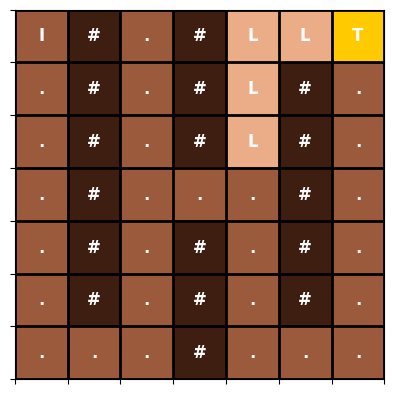

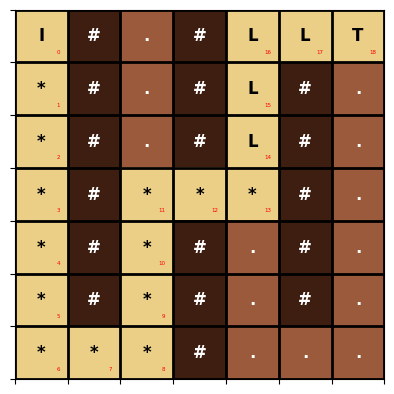

In [161]:
mapa = [
    ['I', '#', '.', '#', 'L', 'L', 'T'],
    ['.', '#', '.', '#', 'L', '#', '.'],
    ['.', '#', '.', '#', 'L', '#', '.'],
    ['.', '#', '.', '.', '.', '#', '.'],
    ['.', '#', '.', '#', '.', '#', '.'],
    ['.', '#', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.'],
]

caminho = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (6, 1), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (0, 4), (0, 5), (0, 6)]

# Mostra o mapa inicial
print_mapa(mapa)

# Mostra a grid com o caminho
print_caminho(mapa, caminho)


In [162]:
# Setup
from heapq import heappop, heappush
class PriorityQueue():
    def __init__(self):
        self.heap = []

    def push(self, k):
        heappush(self.heap, k)

    def pop(self):
        return heappop(self.heap)

    def empty(self):
        return (len(self.heap) == 0)

def manhathan_distance(source, dest) -> int:
  return (abs(source[0] - dest[0]) + abs(source[1] - dest[1]))

def is_valid(coord, lims, grid) -> bool:
  (i, j) = coord
  (n, m) = lims
  return ((0 <= i and i < n) and (0 <= j and j < m) and grid[i][j] != '#')

def get_path(grid_path, pos_inicial, pos_tesouro):
  path = list()
  tile = pos_tesouro
  if (grid_path[pos_tesouro[0]][pos_tesouro[1]] is None): return []
  while (tile != pos_inicial and tile is not None):
    i, j = tile
    path.append((i, j))
    tile = grid_path[i][j]
  path.append(tile)

  return path[::-1]

def get_tile_cost(tile) -> int:
  if (tile == 'L'): return 5
  if (tile == 'T'): return 0
  return 1

dirs = [(0, 1), (1, 0),(-1, 0), (0, -1)]

In [163]:
def busca_custo_uniforme(grid, pos_inicial, pos_tesouro):
    n, m = len(grid), len(grid[0])
    parents = [[None] * m for i in range(n)]

    pq = PriorityQueue()

    pq.push((0, pos_inicial, (-1, -1)))

    while not pq.empty():
      (cost, curr_pos, parent) = pq.pop()
      (i, j) = curr_pos

      if(parents[i][j] is not None): continue
      parents[i][j] = parent
      if(curr_pos == pos_tesouro):
        break

      for (adj_i, adj_j) in dirs:
        adj_i += i
        adj_j += j
        if(not is_valid((adj_i, adj_j), (n, m), grid)): continue

        pq.push((cost + get_tile_cost(grid[adj_i][adj_j]), (adj_i, adj_j), curr_pos))


    return get_path(parents, pos_inicial, pos_tesouro)

In [164]:
def busca_gulosa(grid, pos_inicial, pos_tesouro):
    n, m = len(grid), len(grid[0])
    parents = [[None] * m for i in range(n)]

    pq = PriorityQueue()

    pq.push((manhathan_distance(pos_inicial, pos_tesouro), pos_inicial, (-1, -1)))

    while not pq.empty():
      (cost, curr_pos, parent) = pq.pop()
      (i, j) = curr_pos

      if(parents[i][j] is not None): continue
      parents[i][j] = parent
      if(curr_pos == pos_tesouro):
        break

      for (adj_i, adj_j) in dirs:
        adj_i += i
        adj_j += j
        if(not is_valid((adj_i, adj_j), (n, m), grid)): continue
        next_tile = (adj_i, adj_j)
        pq.push((manhathan_distance(next_tile, pos_tesouro), next_tile, curr_pos))


    return get_path(parents, pos_inicial, pos_tesouro)

In [165]:
def busca_a_estrela(grid, pos_inicial, pos_tesouro):
    n, m = len(grid), len(grid[0])
    parents = [[None] * m for i in range(n)]

    pq = PriorityQueue()

    pq.push((manhathan_distance(pos_inicial, pos_tesouro), pos_inicial, (-1, -1)))

    while not pq.empty():
      (cost, curr_pos, parent) = pq.pop()
      (i, j) = curr_pos
      if(parents[i][j] is not None): continue
      parents[i][j] = parent
      if(curr_pos == pos_tesouro):
        break
      cost -= manhathan_distance(curr_pos, pos_tesouro)
      for (adj_i, adj_j) in dirs:
        adj_i += i
        adj_j += j
        if(not is_valid((adj_i, adj_j), (n, m), grid)): continue
        next_tile = (adj_i, adj_j)

        a_start_cost = manhathan_distance(next_tile, pos_tesouro) + cost + get_tile_cost(grid[adj_i][adj_j])
        pq.push((a_start_cost, next_tile, curr_pos))


    return get_path(parents, pos_inicial, pos_tesouro)

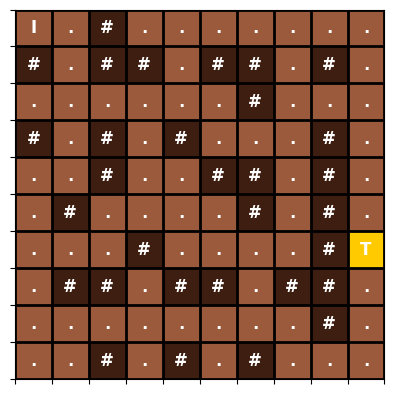

In [166]:
grid = [
    ['I', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '.', '#', '#', '.', '#', '#', '.', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '#', '.', '.', '.'],
    ['#', '.', '#', '.', '#', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '.', '#', '#', '.', '#', '.'],
    ['.', '#', '.', '.', '.', '.', '#', '.', '#', '.'],
    ['.', '.', '.', '#', '.', '.', '.', '.', '#', 'T'],
    ['.', '#', '#', '.', '#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
    ['.', '.', '#', '.', '#', '.', '#', '.', '.', '.'],
]
pos_inicial = (0, 0)
pos_tesouro = (6, 9)

print_mapa(grid)

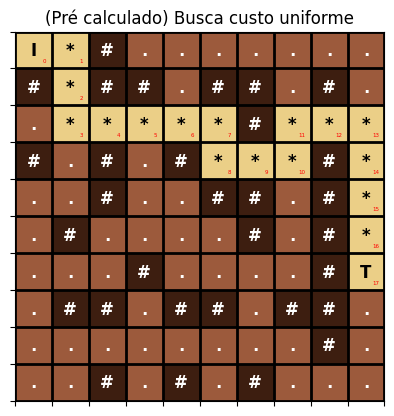

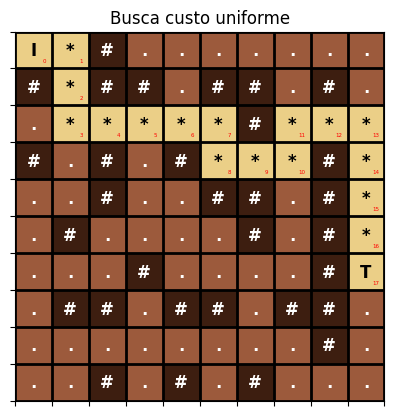

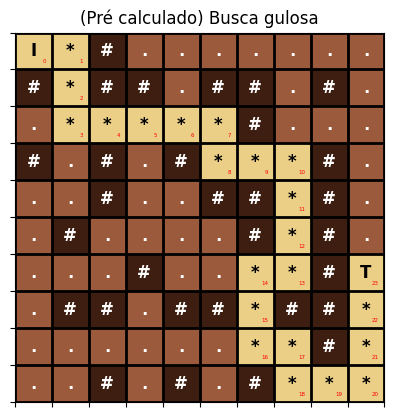

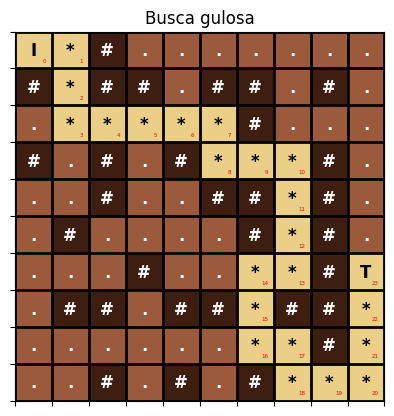

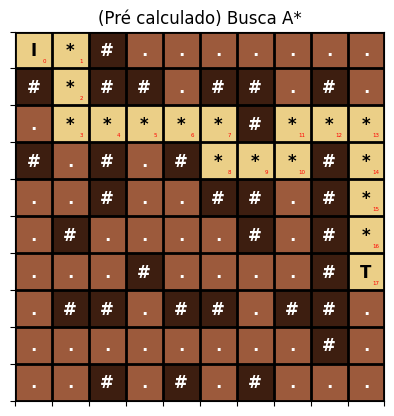

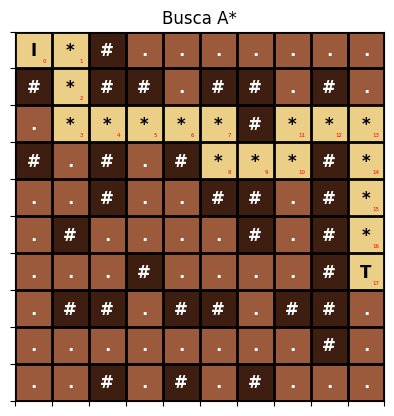

In [167]:
caminho_bcu = busca_custo_uniforme(grid, pos_inicial, pos_tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, pos_tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, pos_tesouro)

pre_caminho_bcu = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)]
pre_caminho_gulosa = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (6, 7), (6, 6), (7, 6), (8, 6), (8, 7), (9, 7), (9, 8), (9, 9), (8, 9), (7, 9), (6, 9)]
pre_caminho_a_estrela = [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9)]

print_caminho(grid, pre_caminho_bcu, "(Pré calculado) Busca custo uniforme")
print_caminho(grid, caminho_bcu, "Busca custo uniforme")
print_caminho(grid, pre_caminho_gulosa, "(Pré calculado) Busca gulosa")
print_caminho(grid, caminho_gulosa, "Busca gulosa")
print_caminho(grid, pre_caminho_a_estrela, "(Pré calculado) Busca A*")
print_caminho(grid, caminho_a_estrela, "Busca A*")

In [168]:
grid = [
    ['I', '.', '.', '.', '.', '.'],
    ['#', '#', '.', '#', '#', '.'],
    ['.', '.', '.', '#', 'L', '.'],
    ['.', 'L', '#', 'T', '.', '.'],
    ['.', '.', '.', '.', '.', '.']
]
pos_inicial = (0, 0)
pos_tesouro = (3, 3)


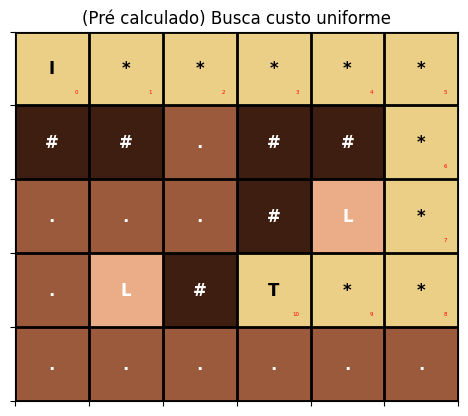

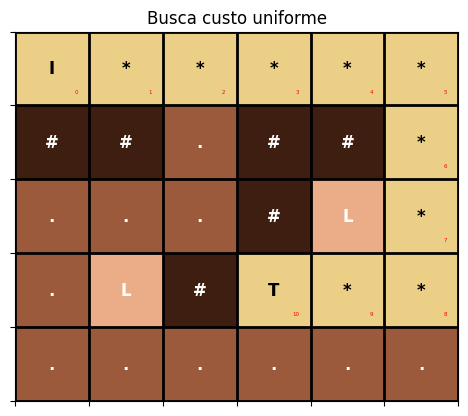

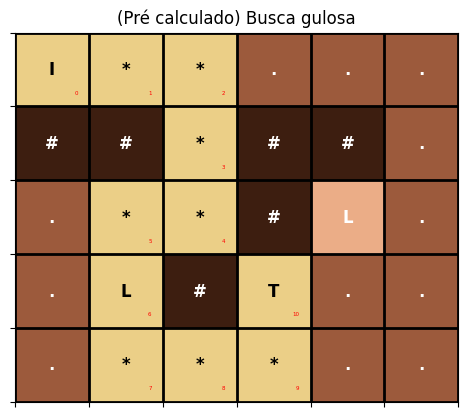

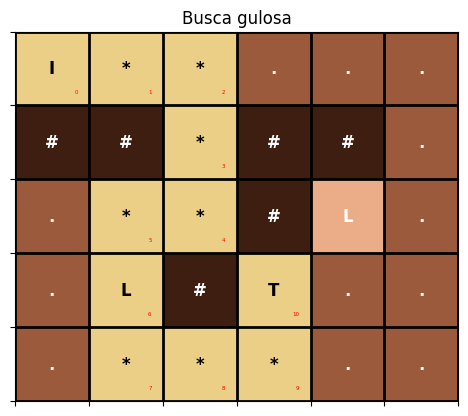

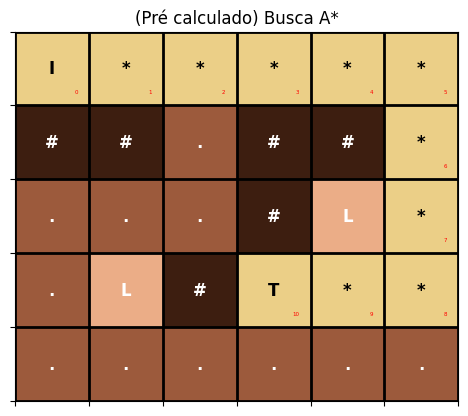

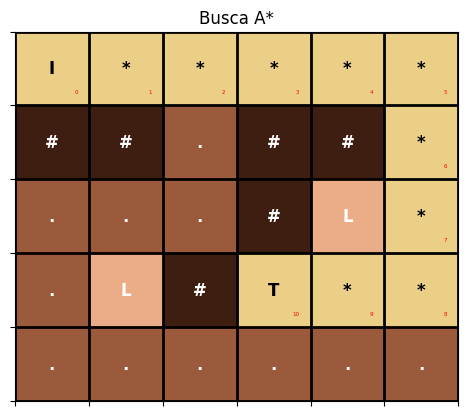

In [169]:
caminho_bcu = busca_custo_uniforme(grid, pos_inicial, pos_tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, pos_tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, pos_tesouro)
pre_caminho_bcu = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3)]
pre_caminho_gulosa = [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (3, 3)]
pre_caminho_a_estrela = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (3, 4), (3, 3)]


print_caminho(grid, pre_caminho_bcu, "(Pré calculado) Busca custo uniforme")
print_caminho(grid, caminho_bcu, "Busca custo uniforme")
print_caminho(grid, pre_caminho_gulosa, "(Pré calculado) Busca gulosa")
print_caminho(grid, caminho_gulosa, "Busca gulosa")
print_caminho(grid, pre_caminho_a_estrela, "(Pré calculado) Busca A*")
print_caminho(grid, caminho_a_estrela, "Busca A*")

In [170]:

grid = [
    ['I', '.', 'L', 'L', 'L', '.', 'T'],
    ['.', '.', '.', 'L', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.'],
]
pos_inicial = (0, 0)
pos_tesouro = (0, 6)

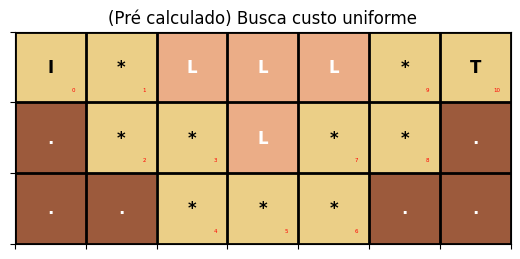

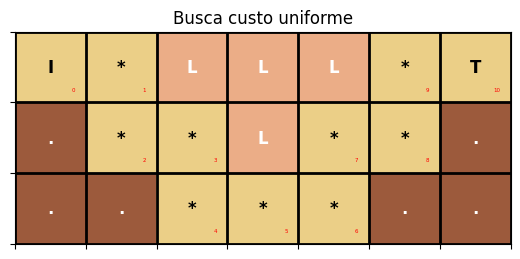

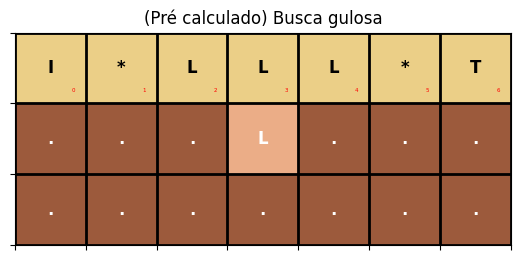

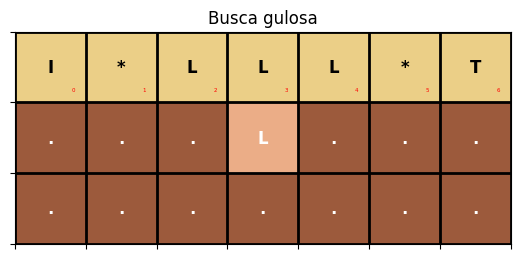

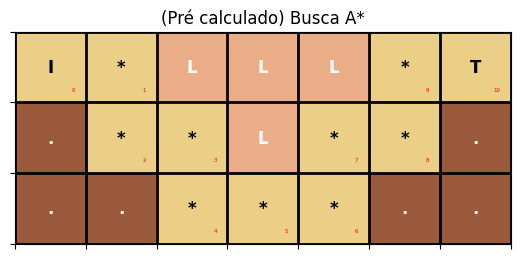

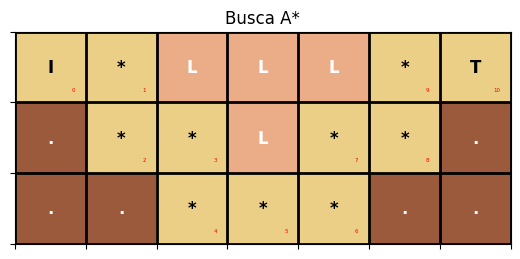

In [171]:
caminho_bcu = busca_custo_uniforme(grid, pos_inicial, pos_tesouro)
caminho_gulosa = busca_gulosa(grid, pos_inicial, pos_tesouro)
caminho_a_estrela = busca_a_estrela(grid, pos_inicial, pos_tesouro)

pre_caminho_bcu = [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6)]
pre_caminho_gulosa = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
pre_caminho_a_estrela = [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 4), (1, 4), (1, 5), (0, 5), (0, 6)]

print_caminho(grid, pre_caminho_bcu, "(Pré calculado) Busca custo uniforme")
print_caminho(grid, caminho_bcu, "Busca custo uniforme")
print_caminho(grid, pre_caminho_gulosa, "(Pré calculado) Busca gulosa")
print_caminho(grid, caminho_gulosa, "Busca gulosa")
print_caminho(grid, pre_caminho_a_estrela, "(Pré calculado) Busca A*")
print_caminho(grid, caminho_a_estrela, "Busca A*")

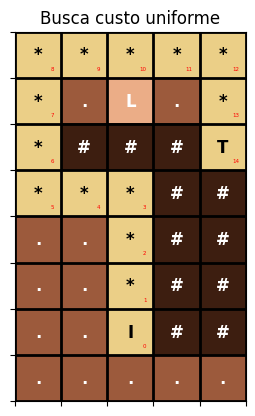

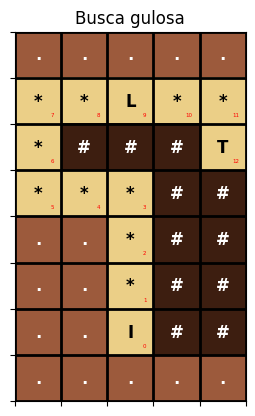

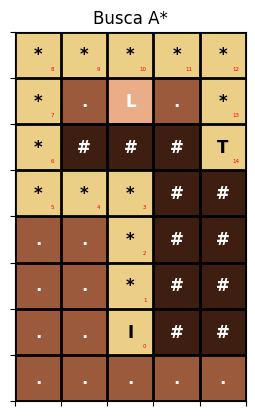

In [172]:


from heapq import heappop, heappush
class PriorityQueue():
    def __init__(self):
        self.heap = []

    def push(self, k):
        heappush(self.heap, k)

    def pop(self):
        return heappop(self.heap)

    def empty(self):
        return (len(self.heap) == 0)

def manhathan_distance(source, dest) -> int:
  return (abs(source[0] - dest[0]) + abs(source[1] - dest[1]))

def is_valid(coord, lims, grid) -> bool:
  (i, j) = coord
  (n, m) = lims
  return ((0 <= i and i < n) and (0 <= j and j < m) and grid[i][j] != '#')

def get_path(grid_path, pos_inicial, pos_tesouro):
  path = list()
  tile = pos_tesouro
  while (tile != pos_inicial and tile is not None):
    i, j = tile
    path.append((i, j))
    tile = grid_path[i][j]
  path.append(tile)

  return path[::-1]

def get_tile_cost(tile) -> int:
  if (tile == 'L'): return 5
  if (tile == 'T'): return 0
  return 1

dirs = [(0, 1), (1, 0), (-1, 0), (0, -1)]


def busca_a_estrela(grid, pos_inicial, pos_tesouro):
    n, m = len(grid), len(grid[0])
    parents = [[None] * m for i in range(n)]

    pq = PriorityQueue()

    pq.push((manhathan_distance(pos_inicial, pos_tesouro), pos_inicial, []))

    while not pq.empty():
      (cost, curr_pos, path) = pq.pop()
      (i, j) = curr_pos
      if(parents[i][j]): continue
      parents[i][j] = True
      path.append((i, j))

      if(curr_pos[0] == pos_tesouro[0] and curr_pos[1] == pos_tesouro[1]):
        return path

      cost -= manhathan_distance(curr_pos, pos_tesouro)
      for (ii, jj) in dirs:
        adj_i = ii + i
        adj_j = jj + j
        if(not is_valid((adj_i, adj_j), (n, m), grid)): continue
        if(parents[adj_i][adj_j]): continue
        next_tile = (adj_i, adj_j)

        a_start_cost = manhathan_distance(next_tile, pos_tesouro) + cost + get_tile_cost(grid[adj_i][adj_j])
        pq.push((a_start_cost, next_tile, path[:]))

    return []